In [2]:
install.packages('rcompanion')

also installing the dependency ‘lmtest’





The downloaded binary packages are in
	/var/folders/17/1s12c7d93tz_93j94s44qsl40000gn/T//RtmpKu05v2/downloaded_packages


In [3]:
install.packages('car')

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘caret’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’





  There is a binary version available but the source version is later:
   binary source needs_compilation
sp  1.4-5  1.4-6              TRUE


The downloaded binary packages are in
	/var/folders/17/1s12c7d93tz_93j94s44qsl40000gn/T//RtmpKu05v2/downloaded_packages


installing the source package ‘sp’




In [4]:
install.packages('effects')
install.packages('multcomp')

also installing the dependencies ‘mitools’, ‘survey’, ‘estimability’, ‘insight’





The downloaded binary packages are in
	/var/folders/17/1s12c7d93tz_93j94s44qsl40000gn/T//RtmpKu05v2/downloaded_packages

The downloaded binary packages are in
	/var/folders/17/1s12c7d93tz_93j94s44qsl40000gn/T//RtmpKu05v2/downloaded_packages


In [15]:
library("rcompanion")
library("car")
library("effects")
library("multcomp")
library(tidyverse)

Loading required package: carData

lattice theme set by effectsTheme()
See ?effectsTheme for details.

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::recode() masks car::recode()
✖ dplyr::select() masks MASS::select()
✖ purrr::some()   masks car::some()



In [1]:
graduate_admissions = read.csv('../../../Data/graduate_admissions.csv')

In [2]:
str(graduate_admissions$University.Rating)

 int [1:400] 4 4 3 3 2 5 3 2 1 3 ...


In [12]:
graduate_admissions$University.Rating <- as.factor(graduate_admissions$University.Rating)


In [13]:
str(graduate_admissions$Research)
graduate_admissions$Research <- as.factor(graduate_admissions$Research)

 int [1:400] 1 1 1 1 0 1 1 0 0 0 ...


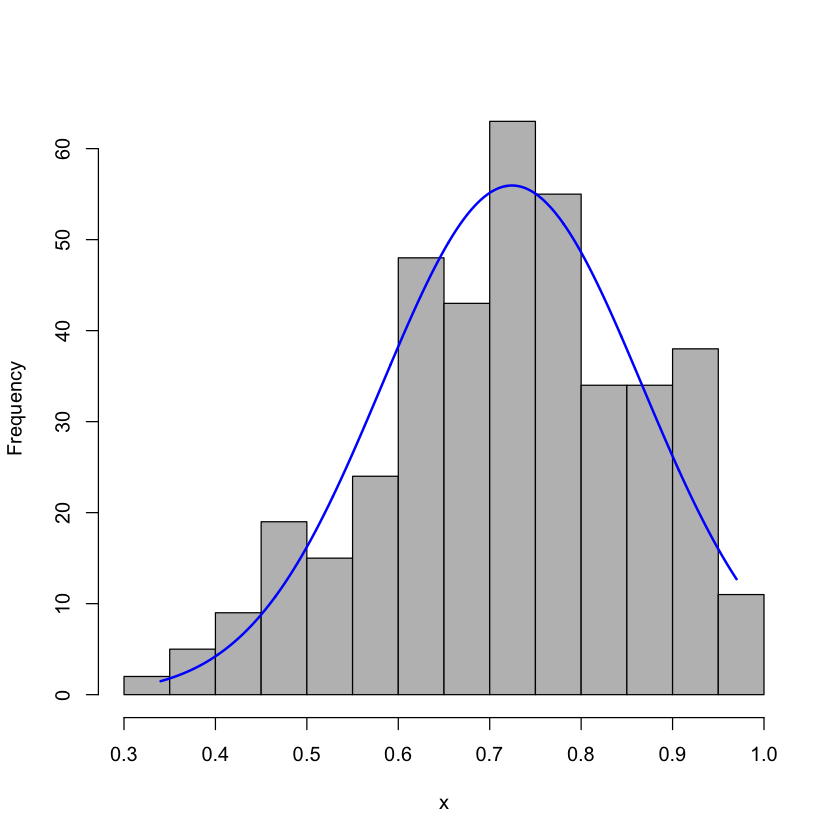

In [16]:
plotNormalHistogram(graduate_admissions$Chance.of.Admit)


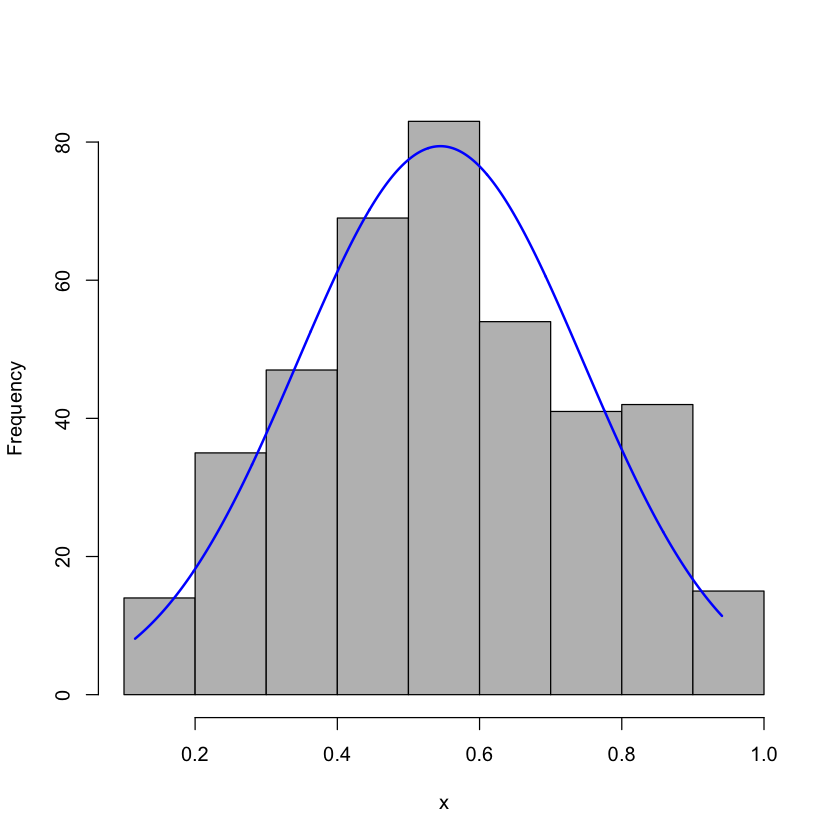

In [17]:
graduate_admissions$Chance.of.AdmitSQ <- graduate_admissions$Chance.of.Admit * graduate_admissions$Chance.of.Admit
plotNormalHistogram(graduate_admissions$Chance.of.AdmitSQ)

In [18]:
leveneTest(Chance.of.AdmitSQ~University.Rating, data=graduate_admissions)


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,4,2.428253,0.04734441
,395,NA,NA


In [19]:
Homogeneity_RegrSlp = lm(Chance.of.AdmitSQ~Research, data=graduate_admissions)
anova(Homogeneity_RegrSlp)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Research,1,5.203531,5.20353061,189.8045,1.394188e-35
Residuals,398,10.911253,0.02741521,NA,NA


In [20]:
ANCOVA = lm(Chance.of.Admit~Research + University.Rating*Research, data=graduate_admissions)
anova(ANCOVA)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Research,1,2.4833417,2.483341659,293.281195,1.990802e-49
University.Rating,4,2.1883504,0.547087607,64.610726,6.897450e-42
Research:University.Rating,4,0.1406363,0.035159083,4.152267,2.634129e-03
Residuals,390,3.3023026,0.008467443,NA,NA


In [21]:
postHocs <- glht(ANCOVA,linfct=mcp(University.Rating = "Tukey"))
summary(postHocs)

Warning message in mcp2matrix(model, linfct = linfct):
“covariate interactions found -- default contrast might be inappropriate”



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = Chance.of.Admit ~ Research + University.Rating * 
    Research, data = graduate_admissions)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
2 - 1 == 0  0.06939    0.02272   3.054   0.0183 *  
3 - 1 == 0  0.13581    0.02323   5.846   <0.001 ***
4 - 1 == 0  0.15352    0.03111   4.935   <0.001 ***
5 - 1 == 0  0.20827    0.03823   5.448   <0.001 ***
3 - 2 == 0  0.06642    0.01579   4.205   <0.001 ***
4 - 2 == 0  0.08413    0.02603   3.233   0.0104 *  
5 - 2 == 0  0.13888    0.03422   4.058   <0.001 ***
4 - 3 == 0  0.01771    0.02648   0.669   0.9596    
5 - 3 == 0  0.07246    0.03457   2.096   0.2081    
5 - 4 == 0  0.05475    0.04029   1.359   0.6350    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)
